# 3. DETECÇÃO DE FRAUDES COM ÁRVORE DE DECISÃO

# === IMPORTAÇÃO DE BIBLIOTECAS ===

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, RocCurveDisplay
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
import seaborn as sns

# === 1. CARGA DO DATASET ===

In [2]:
df = pd.read_csv("creditcard.csv")
print("Total de transações:", len(df))
print("Total de fraudes:", df['Class'].sum())

Total de transações: 284807
Total de fraudes: 492


# === 2. PRÉ-PROCESSAMENTO ===

In [3]:
X = df.drop("Class", axis=1)
y = df["Class"]

In [4]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Balanceamento com SMOTE

In [5]:
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_scaled, y)
print("Após SMOTE - fraudes:", sum(y_resampled), "| legítimas:", len(y_resampled) - sum(y_resampled))

Após SMOTE - fraudes: 284315 | legítimas: 284315


# Divisão treino/teste

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# === 3. MODELO ÁRVORE DE DECISÃO ===

In [7]:
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)
y_pred = dt_model.predict(X_test)
y_proba = dt_model.predict_proba(X_test)[:, 1]

# === 4. AVALIAÇÃO ===

In [8]:
print("\n=== MATRIZ DE CONFUSÃO ===")
print(confusion_matrix(y_test, y_pred))

print("\n=== RELATÓRIO DE CLASSIFICAÇÃO ===")
print(classification_report(y_test, y_pred))

auc = roc_auc_score(y_test, y_proba)
print(f"\n=== ROC-AUC: {auc:.4f} ===")


=== MATRIZ DE CONFUSÃO ===
[[56605   145]
 [   58 56918]]

=== RELATÓRIO DE CLASSIFICAÇÃO ===
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56750
           1       1.00      1.00      1.00     56976

    accuracy                           1.00    113726
   macro avg       1.00      1.00      1.00    113726
weighted avg       1.00      1.00      1.00    113726


=== ROC-AUC: 0.9982 ===


# Curva ROC

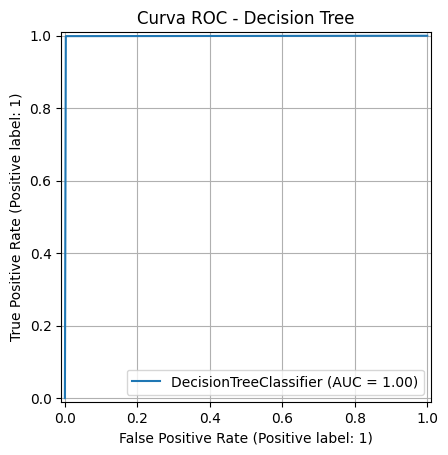

In [9]:
RocCurveDisplay.from_estimator(dt_model, X_test, y_test)
plt.title("Curva ROC - Decision Tree")
plt.grid(True)
plt.show()

# Heatmap da matriz de confusão

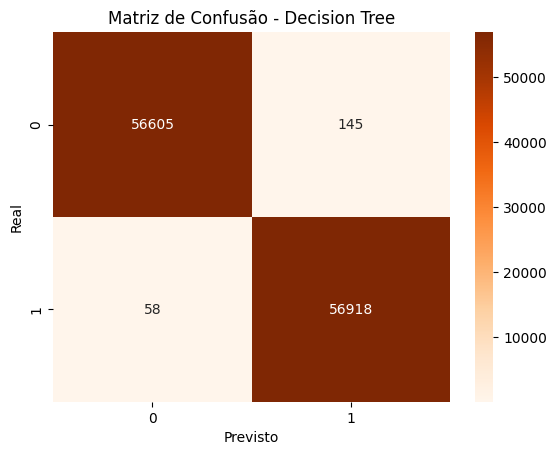

In [10]:
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap="Oranges")
plt.title("Matriz de Confusão - Decision Tree")
plt.xlabel("Previsto")
plt.ylabel("Real")
plt.show()